In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path, img_size=224):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make batch of 1
    img_array = preprocess_input(img_array)
    return img_array


In [3]:
import os

# Define path to the dataset
DATA_DIR = "D:\\FYP\\Vision Model\\dataset\\Newfolder\\cropped"
class_names = sorted(os.listdir(DATA_DIR))

print("Class names:", class_names)


Class names: ['n000002', 'n000003', 'n000004', 'n000005', 'n000006', 'n000007']


Class names: ['n000002', 'n000003', 'n000004', 'n000005', 'n000006', 'n000007']
1/1 [==============================] - 1s 523ms/step

✅ Predicted class: n000004
🔢 Class index: 2
📊 Prediction confidence: 0.7853


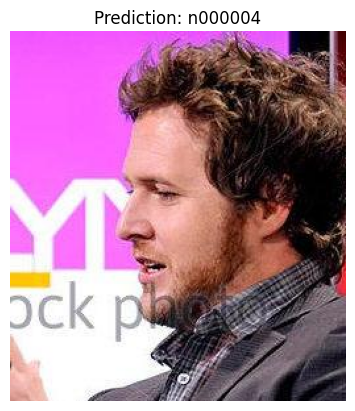

In [5]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# --- STEP 1: Set your dataset and model paths ---
DATA_DIR = "D:\\FYP\\Vision Model\\dataset\\Newfolder\\cropped"
MODEL_PATH = "mobilenetv2_face_recognition.h5"
IMG_PATH = "D:\\FYP\\Vision Model\\dataset\\validation\\4\\0420_01.jpg"  # test image

# --- STEP 2: Load class names from folder structure ---
class_names = sorted(os.listdir(DATA_DIR))  # Make sure this folder has 1 subfolder per class
print("Class names:", class_names)

# --- STEP 3: Load and preprocess image ---
def load_and_preprocess_image(img_path, img_size=224):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make batch of 1
    img_array = preprocess_input(img_array)
    return img_array

# --- STEP 4: Load model and predict ---
model = load_model(MODEL_PATH)
img_tensor = load_and_preprocess_image(IMG_PATH)

predictions = model.predict(img_tensor)
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]

print(f"\n✅ Predicted class: {predicted_class}")
print(f"🔢 Class index: {predicted_index}")
print(f"📊 Prediction confidence: {predictions[0][predicted_index]:.4f}")

# --- STEP 5: Optional – show image with prediction ---
plt.imshow(image.load_img(IMG_PATH))
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()
